In [25]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [26]:
# Dependencies
import numpy as np
import pandas as pd

In [27]:
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [28]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()


,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [29]:
df.dtypes

koi_disposition       object
koi_fpflag_nt          int64
koi_fpflag_ss          int64
koi_fpflag_co          int64
koi_fpflag_ec          int64
koi_period           float64
koi_period_err1      float64
koi_period_err2      float64
koi_time0bk          float64
koi_time0bk_err1     float64
koi_time0bk_err2     float64
koi_impact           float64
koi_impact_err1      float64
koi_impact_err2      float64
koi_duration         float64
koi_duration_err1    float64
koi_duration_err2    float64
koi_depth            float64
koi_depth_err1       float64
koi_depth_err2       float64
koi_prad             float64
koi_prad_err1        float64
koi_prad_err2        float64
koi_teq                int64
koi_insol            float64
koi_insol_err1       float64
koi_insol_err2       float64
koi_model_snr        float64
koi_tce_plnt_num       int64
koi_steff              int64
koi_steff_err1         int64
koi_steff_err2         int64
koi_slogg            float64
koi_slogg_err1       float64
koi_slogg_err2

In [30]:
# Set features. This will also be used as your x values.
selected_features = df

## Data Pre-Processing

In [31]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this


y = selected_features["koi_disposition"].values.reshape(-1, 1)
#X = selected_features#.values.reshape(-1, 1)   - Here axis =1 points to columns Alemi April 1, 2020
X = selected_features.drop("koi_disposition", axis=1)

print("Shape: ", X.shape, y.shape)

Shape:  (6991, 40) (6991, 1)


In [32]:
from sklearn.preprocessing import LabelEncoder

# y = selected_features["koi_disposition"]
# Step 1: Label-encode data set
#label_encoder = LabelEncoder()
#label_encoder.fit(y)
#encoded_y = label_encoder.transform(y)
#encoded_y

In [33]:
# for label, original_class in zip(encoded_y, y):
#     print('Original Class: ' + str(original_class))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [36]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [37]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/piruzalemi/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
# Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

# Fit the model to the data
kmeans.fit(X_train_scaled)

# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_train_scaled)

In [68]:
X_train_scaled[:,2]
X_train_scaled[:,3]

array([0., 0., 0., ..., 0., 1., 0.])

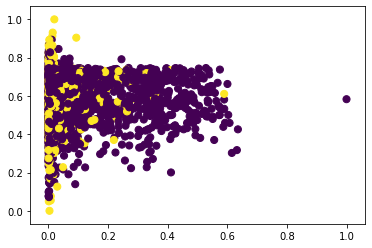

In [70]:
import matplotlib.pyplot as plt
# Plot the clusters
plt.scatter(X_train_scaled[:, 4], X_train_scaled[:, 39], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

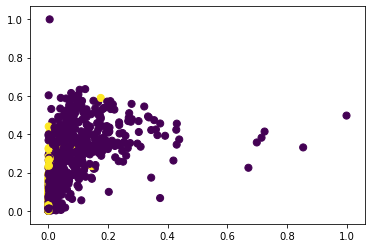

In [73]:
import matplotlib.pyplot as plt
# Plot the clusters
plt.scatter(X_train_scaled[:, 5], X_train_scaled[:, 4], c=predicted_clusters, s=50, cmap='viridis')
plt.show()

In [72]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

# Create a Deep Learning Model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [16]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 11,203
Trainable params: 11,203
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 5243 samples
Epoch 1/60
5243/5243 - 0s - loss: 0.8760 - accuracy: 0.5550
Epoch 2/60
5243/5243 - 0s - loss: 0.7555 - accuracy: 0.6517
Epoch 3/60
5243/5243 - 0s - loss: 0.7311 - accuracy: 0.6616
Epoch 4/60
5243/5243 - 0s - loss: 0.7183 - accuracy: 0.6651
Epoch 5/60
5243/5243 - 0s - loss: 0.7124 - accuracy: 0.6706
Epoch 6/60
5243/5243 - 0s - loss: 0.7076 - accuracy: 0.6731
Epoch 7/60
5243/5243 - 0s - loss: 0.7054 - accuracy: 0.6727
Epoch 8/60
5243/5243 - 0s - loss: 0.7030 - accuracy: 0.6767
Epoch 9/60
5243/5243 - 0s - loss: 0.7018 - accuracy: 0.6729
Epoch 10/60
5243/5243 - 0s - loss: 0.6968 - accuracy: 0.6798
Epoch 11/60
5243/5243 - 0s - loss: 0.6935 - accuracy: 0.6779
Epoch 12/60
5243/5243 - 0s - loss: 0.6932 - accuracy: 0.6796
Epoch 13/60
5243/5243 - 0s - loss: 0.6934 - accuracy: 0.6773
Epoch 14/60
5243/5243 - 0s - loss: 0.6886 - accuracy: 0.6849
Epoch 15/60
5243/5243 - 0s - loss: 0.6847 - accuracy: 0.6832
Epoch 16/60
5243/5243 - 0s - loss: 0.6871 - accuracy: 0.6840
Epoch 17/60

## Quantify our Trained Model

In [19]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

1748/1748 - 0s - loss: 0.6532 - accuracy: 0.6899
Normal Neural Network - Loss: 0.653206277630149, Accuracy: 0.689931333065033


## Make Predictions Transform...

In [20]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [21]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['FALSE POSITIVE' 'FALSE POSITIVE' 'FALSE POSITIVE' 'CANDIDATE'
 'CANDIDATE']
Actual Labels: [array(['CANDIDATE'], dtype=object), array(['FALSE POSITIVE'], dtype=object), array(['FALSE POSITIVE'], dtype=object), array(['CANDIDATE'], dtype=object), array(['FALSE POSITIVE'], dtype=object)]
